# <center>**Predict the fare amount of future rides using regression analysis**

<center><img src="https://entrackr.com/storage/2017/11/uber-image-2.jpg" style="width: 600px;"/>

### Description:

The project focuses on Uber Inc., the world's largest taxi service provider. The aim is to predict future fare amounts for their transactions. As Uber serves millions of customers every day, effectively managing their data has become crucial for generating innovative business strategies. Accurate fare estimation is now more essential than ever to ensure optimal outcomes and maintain efficiency.

The dataset contains the following fields:
* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

### Objective:
- Analyze and Preprocess the Dataset.
- Develop Regression Models for Fare Prediction.
- Evaluate and Compare Model Performance.

# Strategic Plan of action

**Our objective is to address the problem statement by developing a strategic plan, including the following essential steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling and evaluation
7. Project Outcomes & Conclusion

# Uber: Predicting the fare amount of future rides using regression analysis.

* The fare amount of a Uber ride is influenced by various factors such as distance, duration, traffic conditions, time of day, and demand. I am required  to develop a regression model that can predict the fare amount based on these factors. I will work with a dataset that includes historical ride data, including the fare amount and relevant features.

# Load and Explore the Dataset

In [161]:
##### Importing required libraries

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

Reading the csv file

In [162]:
df = pd.read_csv('uber.csv')

##### Checking the shape of the dataset

In [163]:
df.shape

(200000, 9)

200000 Rows, 9 columns

##### First observation of dataset

In [164]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


##### Renaming the 'Unnamed: 0' colum to 'RIDE ID' column

In [165]:
df = df.rename(columns={'Unnamed: 0' : 'Ride ID'})
df.head(5)

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


##### Identifying types of variables

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ride ID            200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


##### Understanding the data

In [167]:
df.describe()

,Ride ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


##### Converting 'key' and 'pickup_datetime' column to datetime

In [168]:
# both the columns 'key' and 'pickup_datetime' appear to be the same and are of the data type object.

df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

##### Extracting columns like year, month, dayofweek, and hour from the 'pickup_datetime' column.

In [169]:
#extracting 'year' column from the column 'pickup_datetime'
df['pickup_year']=df['pickup_datetime'].dt.year

#extracting 'month' column from the column 'pickup_datetime'
df['pickup_month']=df['pickup_datetime'].dt.month

#extracting 'dayofweek' column from the column 'pickup_datetime'
df['pickup_weekday']=df['pickup_datetime'].dt.dayofweek

#extracting 'hour' column from the column 'pickup_datetime'
df['pickup_hour']=df['pickup_datetime'].dt.hour

##### Calcualting distance column and its values using haversine method and columns 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', and, 'dropoff_latitude'.

In [170]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371

    return c * r

In [171]:
#applying haversine function in the column distance_km to calculate distance values in km.
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

##### Checking the new 'distance_km' column

In [172]:
df

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,0.112210
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,1.875050
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,12.850319
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,3.539715


# Handling Missing Data

##### Checking the null values

<Axes: >

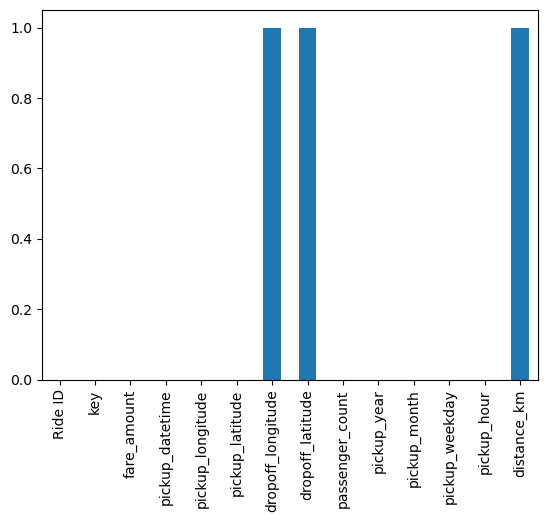

In [173]:
#visualizing the null values in the columns
df.isna().sum().plot(kind='bar')

* Since we have a significant amount of data of 200000 and there are only 1 each null values in columns 'dropoff_longitude', 'dropoff_latitude', & 'distance_km', so dropping the null values won't make much of a difference in model building.

##### Dropping the null values

In [174]:
#dropping null rows from the dataframe df
df.dropna(axis=0, inplace=True)
df.head()

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


<Axes: >

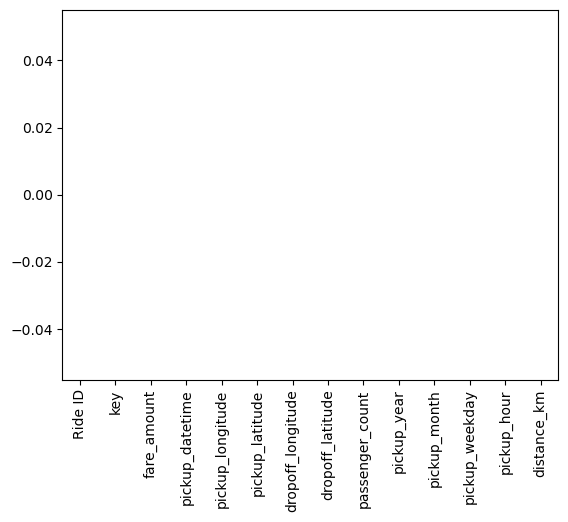

In [175]:
#again visualizing the null values in the columns
df.isna().sum().plot(kind='bar')

# Feature Engineering - I

##### Variable one: pickup_year

<Axes: xlabel='pickup_year', ylabel='count'>

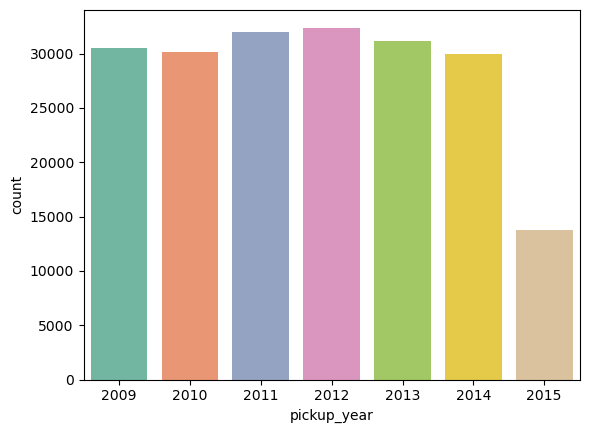

In [176]:
#exploring the distribution of number of uber rides based on the year from 2009 to 2015
sns.countplot(data=df, x='pickup_year', hue='pickup_year', palette='Set2', legend=False)

From the above bar plot we can see that in the years 2011, 2012, and 2013 the number of uber rides was maximum. Similarly, in the year 2015 the number of uber rides reduced drastically.

##### Variable two: pickup_month

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

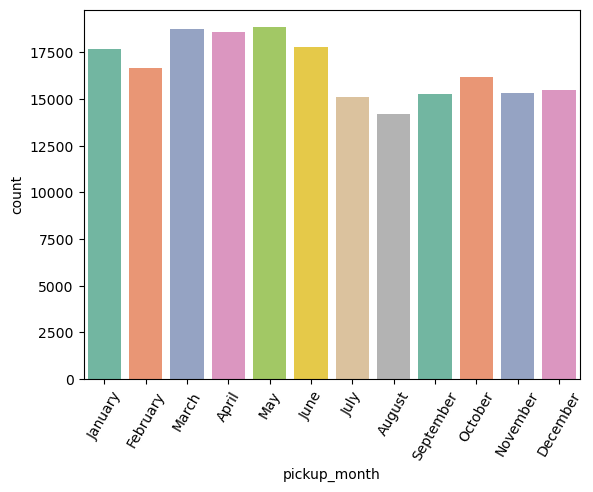

In [177]:
#exploring the distribution of number of uber rides based on the month from January - December
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
ax1 = sns.countplot(data=df, x='pickup_month', hue='pickup_month', palette='Set2', legend=False)
ax1.set_xticklabels(months, rotation = 60)

* From the above bar plot we can observe that in the months of March, April, and May, there are maximum number of uber rides. Similarly, in the months of July, August, September, October, November, and December there are least number of uber rides in comparision to other months.

In [178]:
#mapping the numerical values to the labelled month names
df.loc[:,'pickup_month'] = df['pickup_month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [179]:
#categorizing months based on the season
def month(pickup_month):
    if pickup_month == 'December' or pickup_month == 'January' or pickup_month == 'February':
        return 'Winter'
    elif pickup_month == 'March' or pickup_month == 'April' or pickup_month == 'May':
        return 'Spring'
    elif pickup_month == 'June' or pickup_month == 'July' or pickup_month == 'August':
        return 'Summer'
    else:
        return 'Autumn'

df.loc[:,'pickup_month'] = df['pickup_month'].apply(lambda x: month(x))

* Categorizing 12 months into Winter, Spring, Summer, and Autumn to narrow down the levels and intervals in the 'pickup_month' variable.

<Axes: xlabel='pickup_month', ylabel='count'>

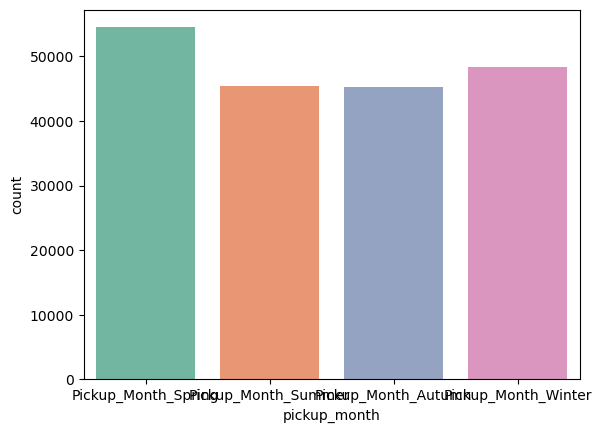

In [270]:
#exploring the distribution of number of uber rides based on the season
sns.countplot(data=df, x='pickup_month', hue='pickup_month', palette='Set2', legend=False)

* From the bar plot we can see that in the Spring season particularly there are more number of uber rides in comparision with other seasons.

In [181]:
#mapping the categorical values of 'pickup_month' column to numerical for correlation heatmap plotting.
df.loc[:,'pickup_month'] = df['pickup_month'].map({'Winter':1,'Summer':2, 'Spring':3, 'Autumn':4})

In [182]:
df['pickup_month'] = df['pickup_month'].astype(int)

# Variable three: pickup_weekday

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

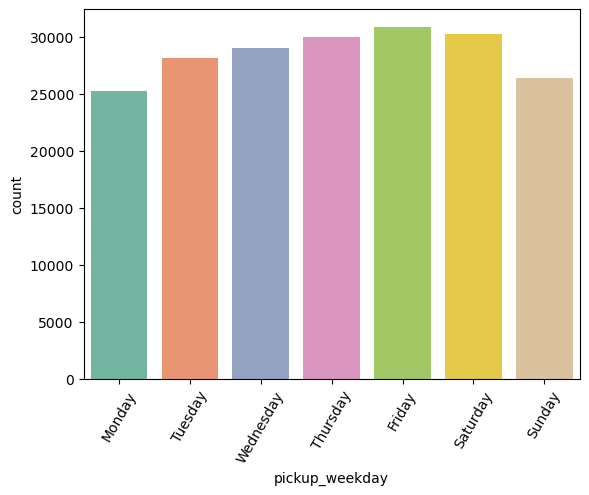

In [183]:
#exploring the distribution of number of uber rides based on the weekdays from Monday - Sunday
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax2 = sns.countplot(data=df, x='pickup_weekday', hue='pickup_weekday', palette='Set2', legend=False )
ax2.set_xticklabels(week_days, rotation = 60)

* From the above weekday bar plot we can see that mainly in the days of Thursday, Fruday, and Saturday there are more uber rides. Similarly, in the days of Sunday, Monday, Tuesday, and Wednesday there are comparatively less number of uber rides.

##### Variable four: pickup_hour

<Axes: xlabel='pickup_hour', ylabel='count'>

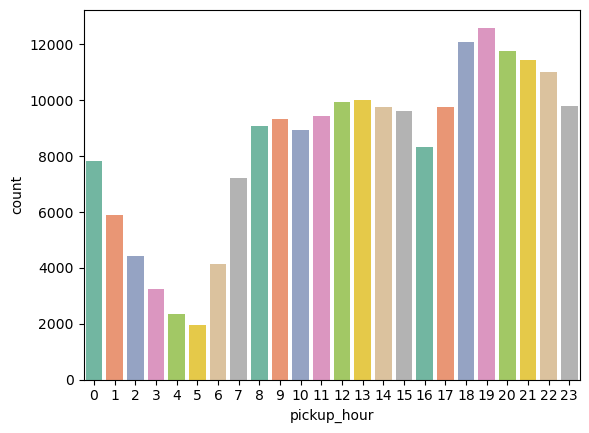

In [184]:
#exploring the distribution of number of uber rides on the hourly basis from 0:00 am till 23:59 pm
sns.countplot(data=df, x='pickup_hour',  hue='pickup_hour', palette='Set2', legend=False )

* From the 'pickup_hour' variable bar plot we can see that between the hours of 12 am till 6 am there are less number of uber rides. Similarly, when the clock hits 7 am the number of uber rides starts to rise up and remain constant till the hour mark of 6 pm (18 pm). However, between the hours of 7 pm (19 pm) and 10 pm (22 pm) the number of uber rides increases to maximum and again slowly starts to come down when the clock hits the hour mark of 11 pm (23 pm). 

In [185]:
#categorizing hours based on the timely interval of 3 hours
def hour_day(pickup_hour):
    if pickup_hour == 0 or 0 < pickup_hour < 3:
        return 'Midnight_Owl'
    elif pickup_hour == 3 or 3 < pickup_hour < 6:
        return 'Early_Bird'
    elif pickup_hour == 6 or 6 < pickup_hour < 9:
        return 'Sunrise_Shift'
    elif pickup_hour == 9 or 9 < pickup_hour < 12:
        return 'Morning_Rush'
    elif pickup_hour == 12 or 12 < pickup_hour < 15:
        return 'Noon_Tide'
    elif pickup_hour == 15 or 15 < pickup_hour < 18:
        return 'Afternoon_Glide'
    elif pickup_hour == 18 or 18 < pickup_hour < 21:
        return 'Evening_Breeze'
    elif pickup_hour == 21 or 21 < pickup_hour <= 23:
        return 'Nightfall_Nooka'

        
df.loc[:,'pickup_hour'] = df['pickup_hour'].apply(lambda x: hour_day(x))

* Categorizing the 'pickup_hour' variable in the timely interval of 3 hours. Initially the total number of levels and categories was 24, however after categorizing it the total number of levels and categories is 8. Reducing the time interval will allow the uber drivers to get better idea about which time intervals in a day are preferable for them to get more uber passengers.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Evening_Breeze'),
  Text(1, 0, 'Nightfall_Nooka'),
  Text(2, 0, 'Sunrise_Shift'),
  Text(3, 0, 'Afternoon_Glide'),
  Text(4, 0, 'Midnight_Owl'),
  Text(5, 0, 'Noon_Tide'),
  Text(6, 0, 'Morning_Rush'),
  Text(7, 0, 'Early_Bird')])

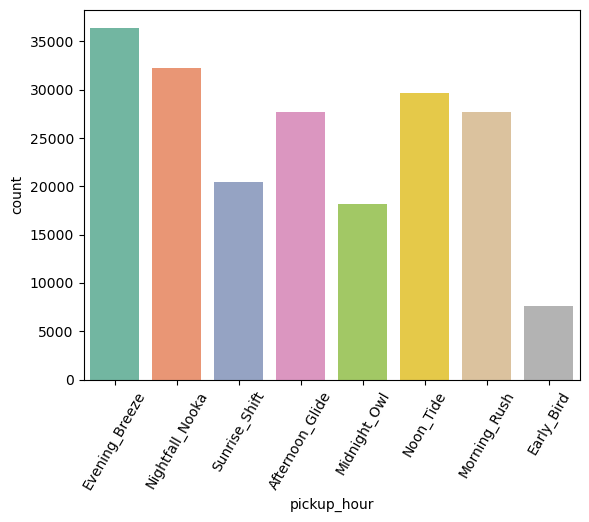

In [186]:
#exploring the distribution of number of uber rides based on the timely interval of 3 hours
sns.countplot(data=df, x='pickup_hour',hue='pickup_hour', palette='Set2', legend=False )
plt.xticks(rotation=60)

* From the abover bar plot of variable 'pickup_hour' it is seen that in the time interval of Evening_Breeze (i.e. between 6 pm (18 pm) and 9 pm (21 pm) there are maximum uber rides. Similarly in the time interval of Early_Bird (i.e. between 3 am and 6 am there are lowest uber rides.

In [187]:
#mapping the categorical values of 'pickup_hour' column to numerical for correlation heatmap plotting.
df.loc[:,'pickup_hour']= df['pickup_hour'].map({'Evening_Breeze':0,'Nightfall_Nooka':1,'Sunrise_Shift':2, 'Afternoon_Glide':3, 'Midnight_Owl':4, 'Noon_Tide':5, 'Morning_Rush':6, 'Early_Bird':7})

In [188]:
df['pickup_hour'] = df['pickup_hour'].astype(int)

# Handling Outliers

* It is very important to handle outliers in a dataset and treat them accordingly via methods of labeling or dropping them. This will ensure that the model built in the further model building phase will be accurate.

In [189]:
#Checking out the minimum value of the column 'fare_amount'
df['fare_amount'].min()

-52.0

In [190]:
#checking out the maximum value of the column 'fare_amount'
df['fare_amount'].max()

499.0

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

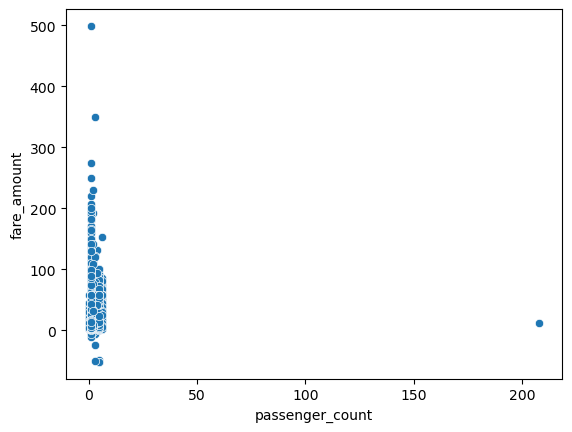

In [191]:
#plotting a scatter plot of columns 'passenger_count' & 'fare_amount'
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')

In [192]:
#checking which row has a 'passenger_count' column value more than 200
df.query('passenger_count > 200')

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
113038,35893772,2010-12-28 08:20:00.000000100,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,2010,1,1,2,0.009825


In [193]:
#keeping only those rows whose values in the column 'passenger_count' is less than 200
df = df[df['passenger_count']<200]

In [194]:
#displaying df dataframe to verify the filtration
df

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,3,0,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,2,4,0,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,2,0,1,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,4,2,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,2,3,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,4,6,6,0.112210
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,4,1.875050
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,2,0,4,12.850319
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,3,2,5,3.539715


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

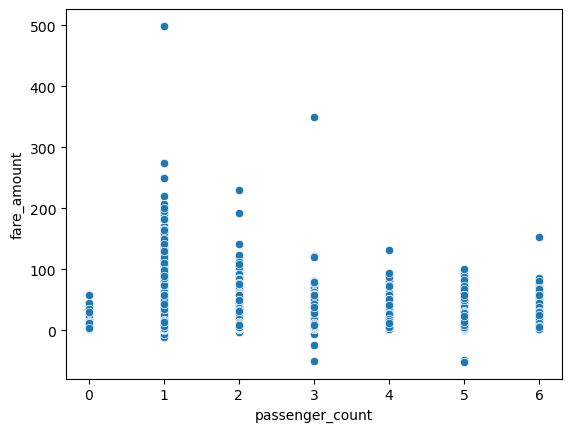

In [195]:
#again plotting a scatter plot of columns 'passenger_count' & 'fare_amount'
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')

#### Dropping the unnecessary variables

In [196]:
df = df.drop(['pickup_datetime', 'Ride ID', 'key'],axis = 1)

##### Box Plot

* Box plot gives you an overview picture of which columns in particular have outliers in them.

<Axes: >

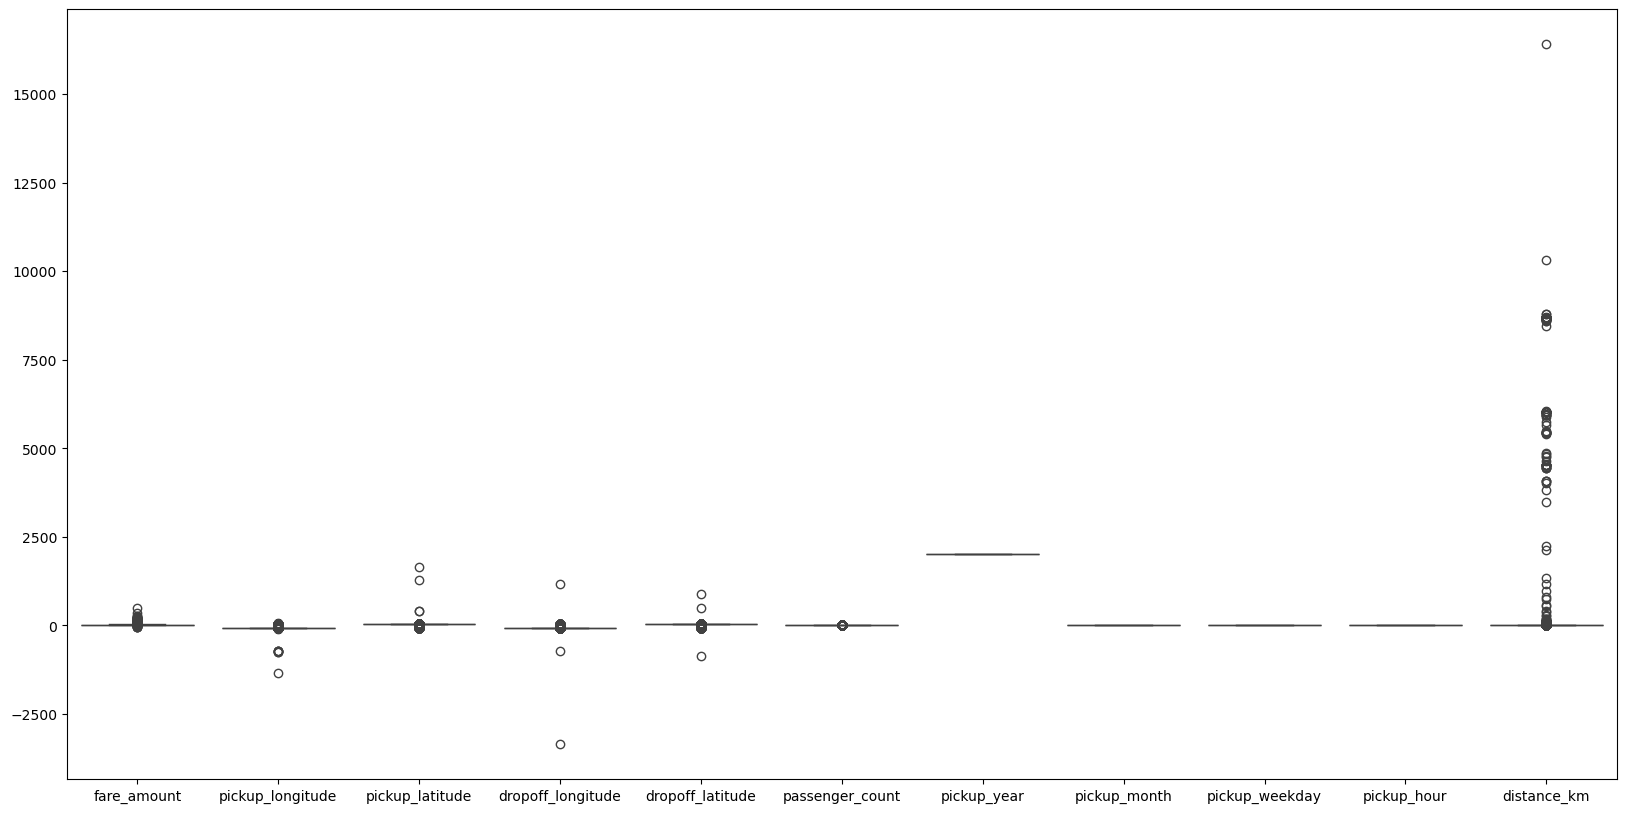

In [197]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199998 non-null  float64
 1   pickup_longitude   199998 non-null  float64
 2   pickup_latitude    199998 non-null  float64
 3   dropoff_longitude  199998 non-null  float64
 4   dropoff_latitude   199998 non-null  float64
 5   passenger_count    199998 non-null  int64  
 6   pickup_year        199998 non-null  int32  
 7   pickup_month       199998 non-null  int32  
 8   pickup_weekday     199998 non-null  int32  
 9   pickup_hour        199998 non-null  int32  
 10  distance_km        199998 non-null  float64
dtypes: float64(6), int32(4), int64(1)
memory usage: 15.3 MB


In [199]:
#selecting all the numeric_columns from the dataframe 'df' and storing it in a new dataframe called 'numeric_columns'
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

In [200]:
df.shape

(199998, 11)

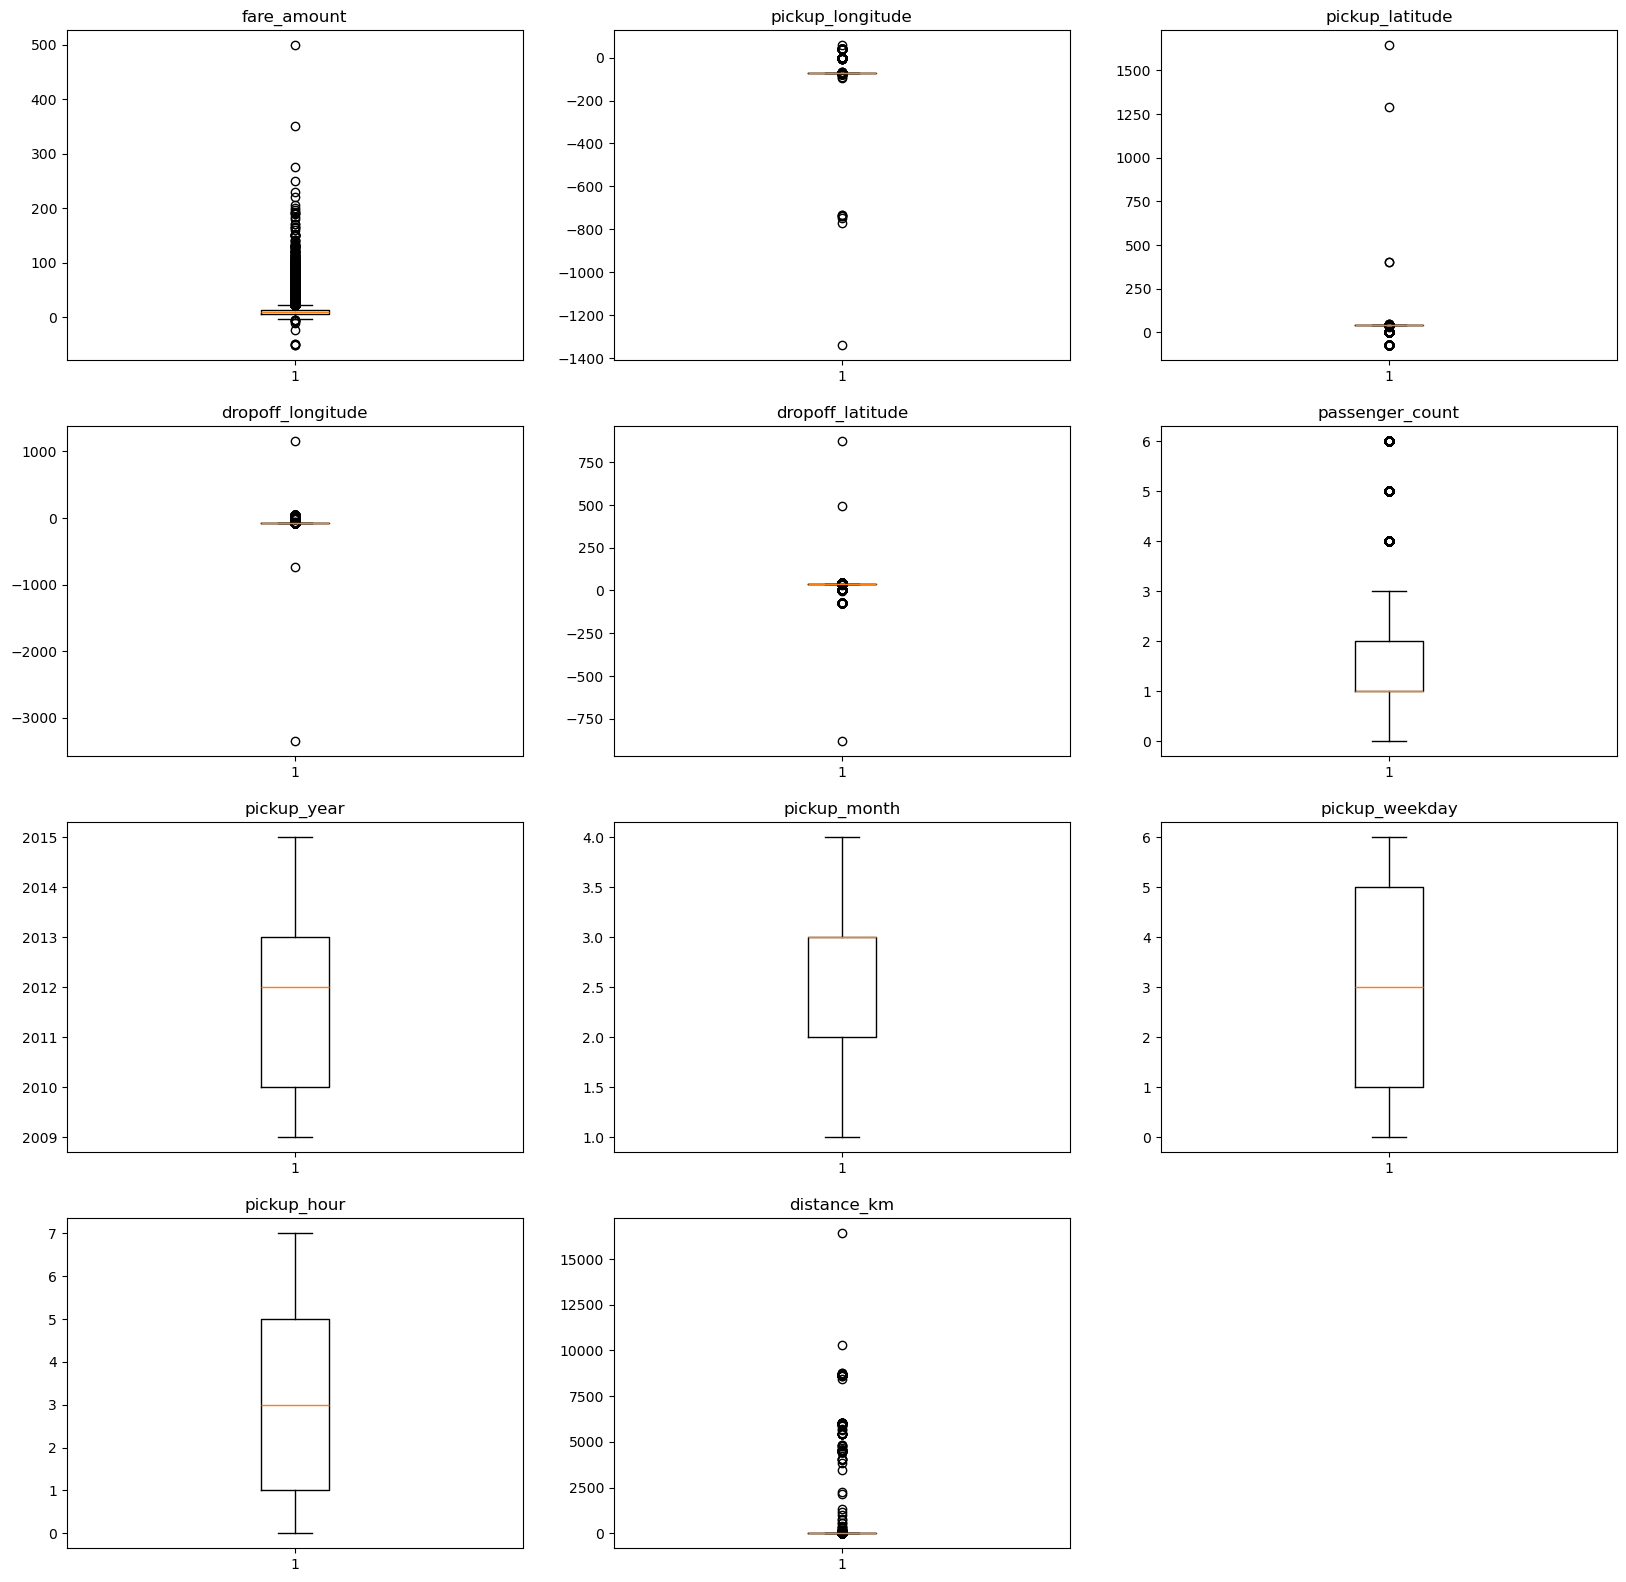

In [201]:
#plotting boxplot for all individual numerical columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    
plt.show()

* The Interquartile Range (IQR) is a measure of statistical dispersion, which is the spread or range of a dataset. Specifically, the IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. These percentiles are key markers in a dataset:

- **Q1 (25th percentile)**: This is the value below which 25% of the data falls. It marks the lower quarter of the data.
- **Q3 (75th percentile)**: This is the value below which 75% of the data falls. It marks the upper quarter of the data.

* The IQR is essential for identifying and handling outliers in a dataset. Outliers are data points that are significantly different from most other data points, and they can distort statistical analyses. By using the IQR, we can establish boundaries (lower and upper whiskers) to determine which data points are too far from the central tendency (either too low or too high) and are considered outliers. This approach is robust against outliers and helps in ensuring the data's integrity for further analysis. 

* In the function `remove_outlier`, the lower whisker is set at Q1 minus 1.5 times the IQR, and the upper whisker is set at Q3 plus 1.5 times the IQR. Data points beyond these whiskers are considered outliers and are clipped to these whisker values, thereby treating the outliers.

In [202]:
# remove_outlier function to remove outliers by calculating IQR from Q1 and Q3 for each individual numerical columns.
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df1.loc[:, col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

# 'treat_outliers_all' function to treat outliers in all columns
def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [203]:
# applying outlier treatment to the DataFrame
df = treat_outliers_all(df, numeric_columns)

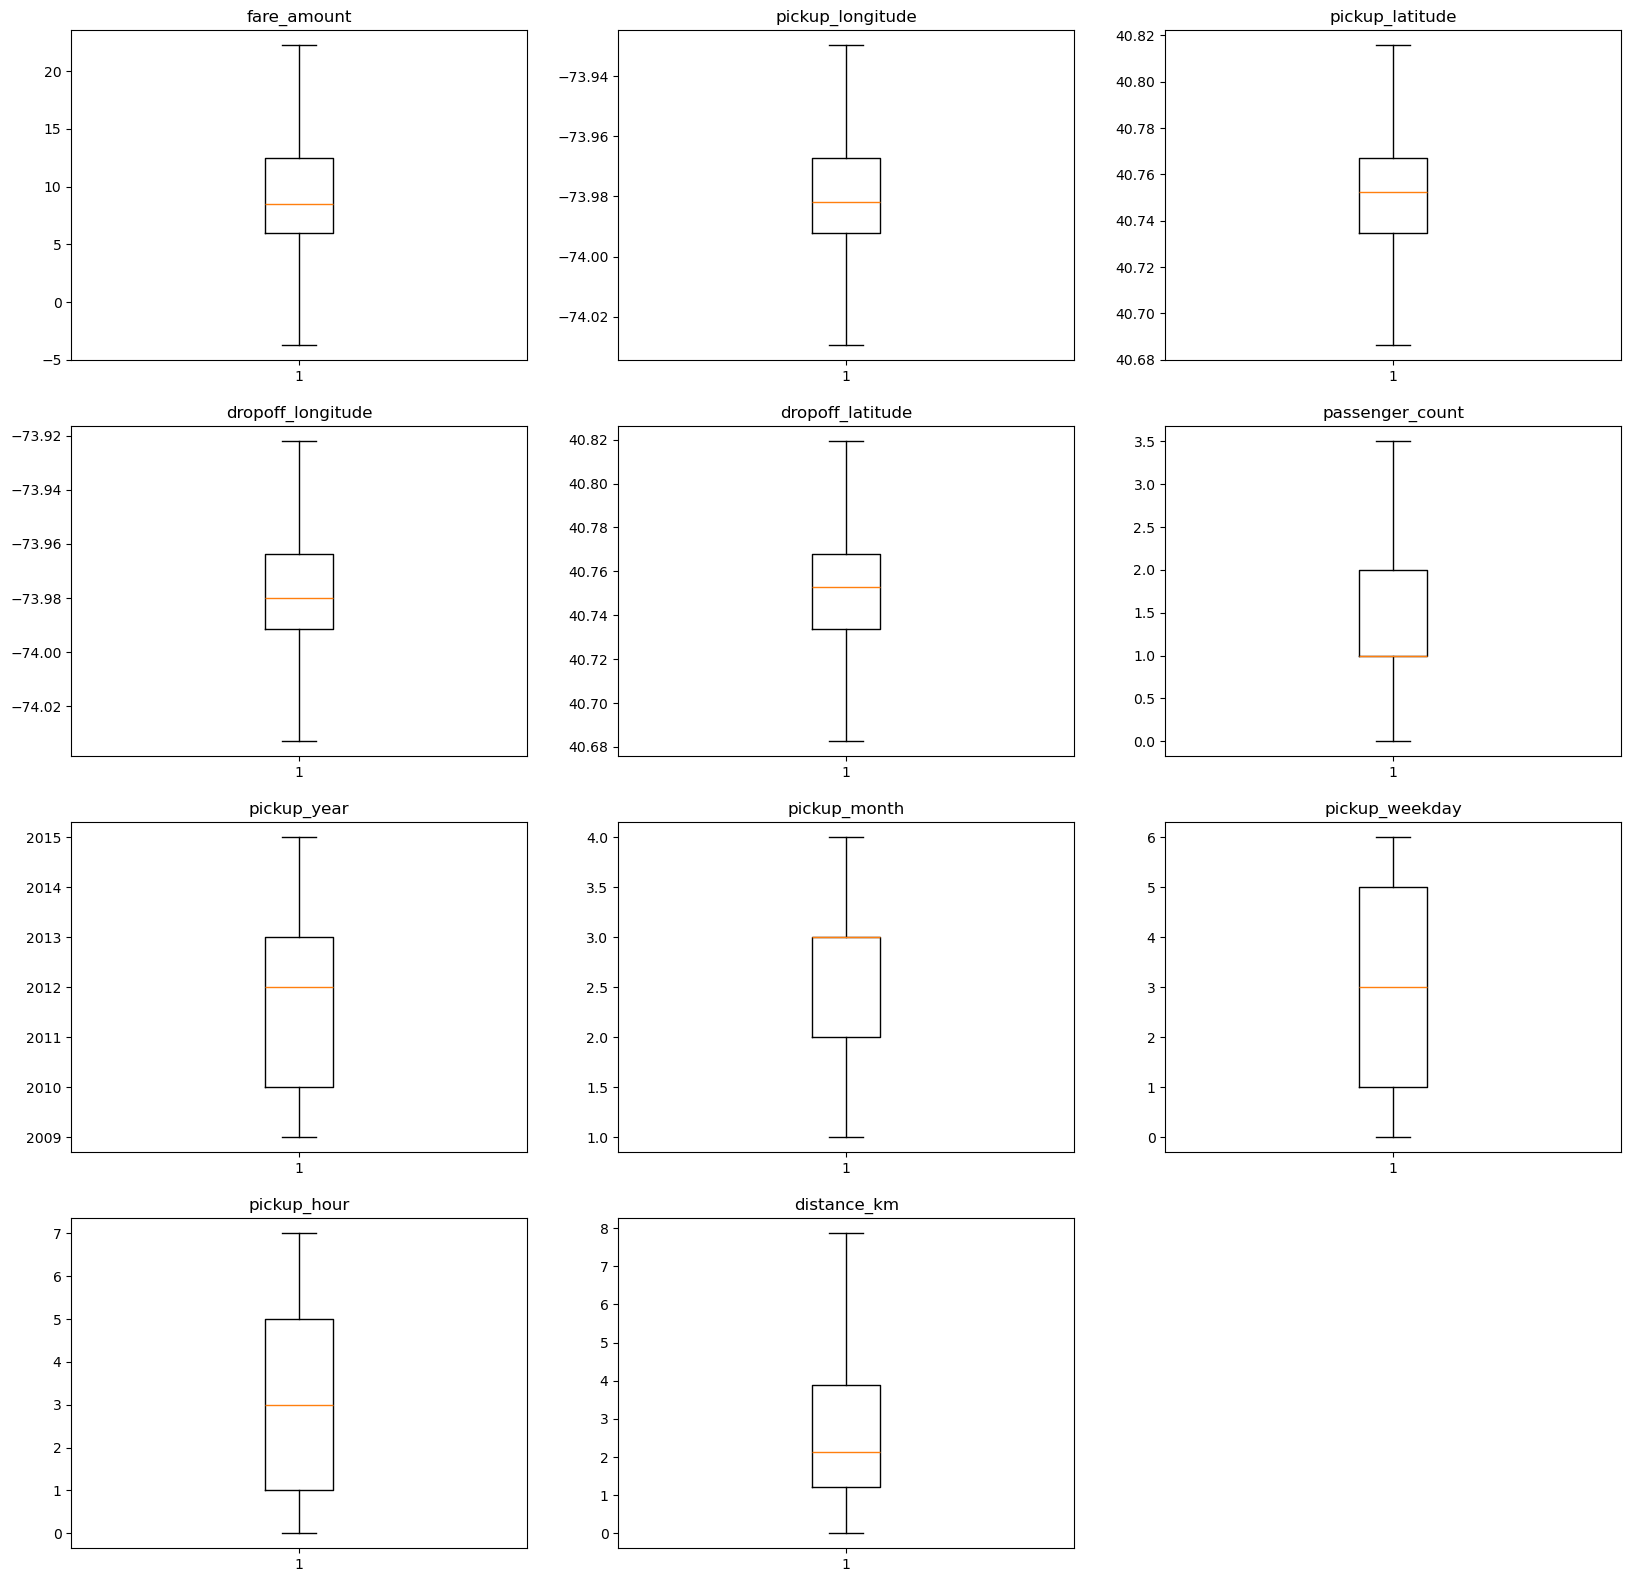

In [204]:
#again plotting boxplot for all individual numerical columns to check for any remaining outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    
plt.show()

##### Checking the shape of the dataset

In [205]:
df.shape

(199998, 11)

# Feature Engineering - II

##### Target Variable: Fare Amount

<Axes: xlabel='fare_amount', ylabel='Count'>

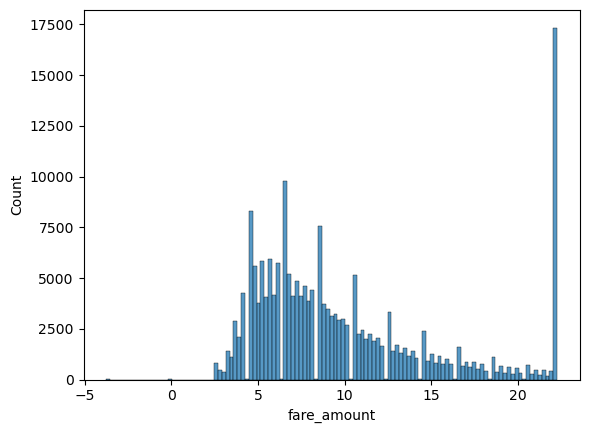

In [206]:
sns.histplot(df['fare_amount'])

* Looking at the histplot of our target variable 'fare_ammount' it can be seen that there are some negative values as well. As far as I know the fare_amount cannot be in negative, so we select the positive values only.

In [207]:
#We will only keep the observation where fare is positive
df = df.loc[(df.fare_amount >= 0)]

In [208]:
df.shape

(199981, 11)

<Axes: xlabel='fare_amount', ylabel='Count'>

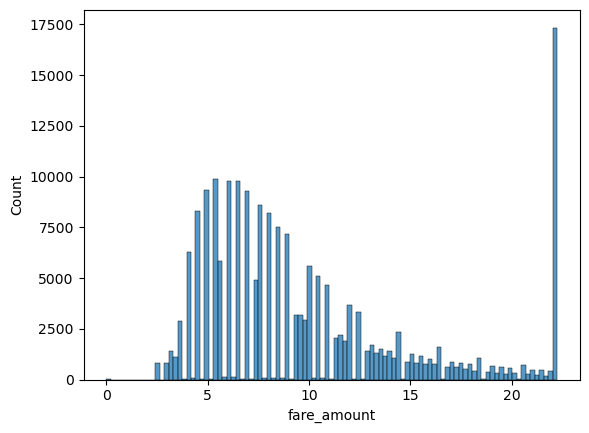

In [209]:
sns.histplot(df['fare_amount'])

* Looking at the histplot again there are some values that are between 0 and 2.5. We will again remove these value and select the values of fare_amount that are greater than 2.5

In [210]:
#We will only keep the observation where fare is greater than 2.5
df = df.query('fare_amount > 2.5')

<Axes: xlabel='fare_amount', ylabel='Count'>

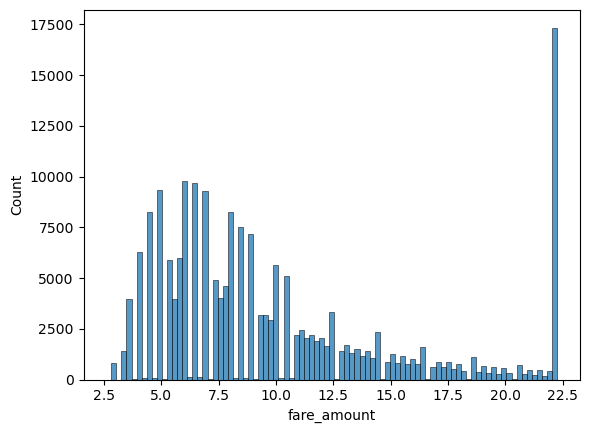

In [211]:
sns.histplot(df['fare_amount'])

In [212]:
df.shape

(199148, 11)

##### Variable five: distance_km

<Axes: xlabel='distance_km', ylabel='Count'>

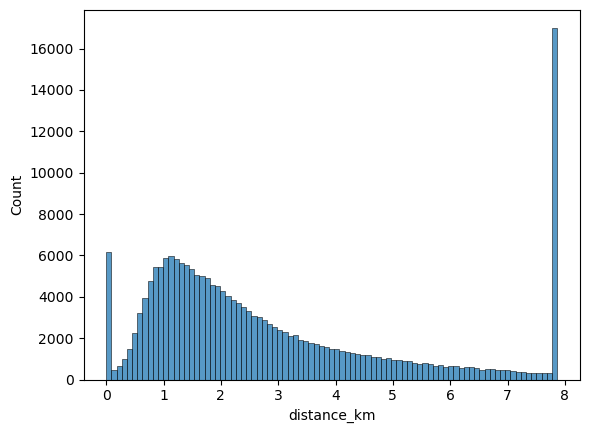

In [213]:
sns.histplot(df['distance_km'])

* Looking at the 'distance_km' variable we can see there are some distance values that are 0. Since, these values are calculated above and the value of 0 might affect the correlation matrix and model building, we select the distance_km values that are greater than 0.

In [214]:
df.shape

(199148, 11)

In [215]:
df = df.query('distance_km > 0.0')

In [216]:
df.shape

(193718, 11)

* After taking distance_km values above 0 our number of rows from 199148 dropped to 193718. This is not a significant drop of rows as in the dataset we have amplenumber of cleaned values still left for further model building.

<Axes: xlabel='distance_km', ylabel='Count'>

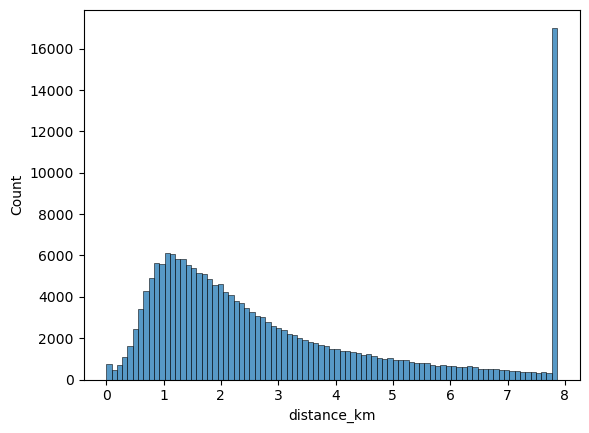

In [217]:
sns.histplot(df['distance_km'])

* Maximum distance_km values are between 7.5 and 8, dropping these values might remove a huge chunk of values from the dataset which might then affect the correlation amtrix and model building. We hence, prevent dropping these values.

In [218]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,3,0,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,2,4,0,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,2,0,1,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,2,4,2,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,2,3,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,4,6,6,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,4,1.875050
199997,22.25,-73.986017,40.756487,-73.922037,40.692588,2.0,2009,2,0,4,7.865133
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,3,2,5,3.539715


In [219]:
# reseting the index for the removed outliers data

df=df.reset_index(drop=True)

In [220]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,3,0,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,2,4,0,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,2,0,1,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,2,4,2,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,2,3,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
193713,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,4,6,6,0.112210
193714,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,4,1.875050
193715,22.25,-73.986017,40.756487,-73.922037,40.692588,2.0,2009,2,0,4,7.865133
193716,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,3,2,5,3.539715


# Correlation Analysis

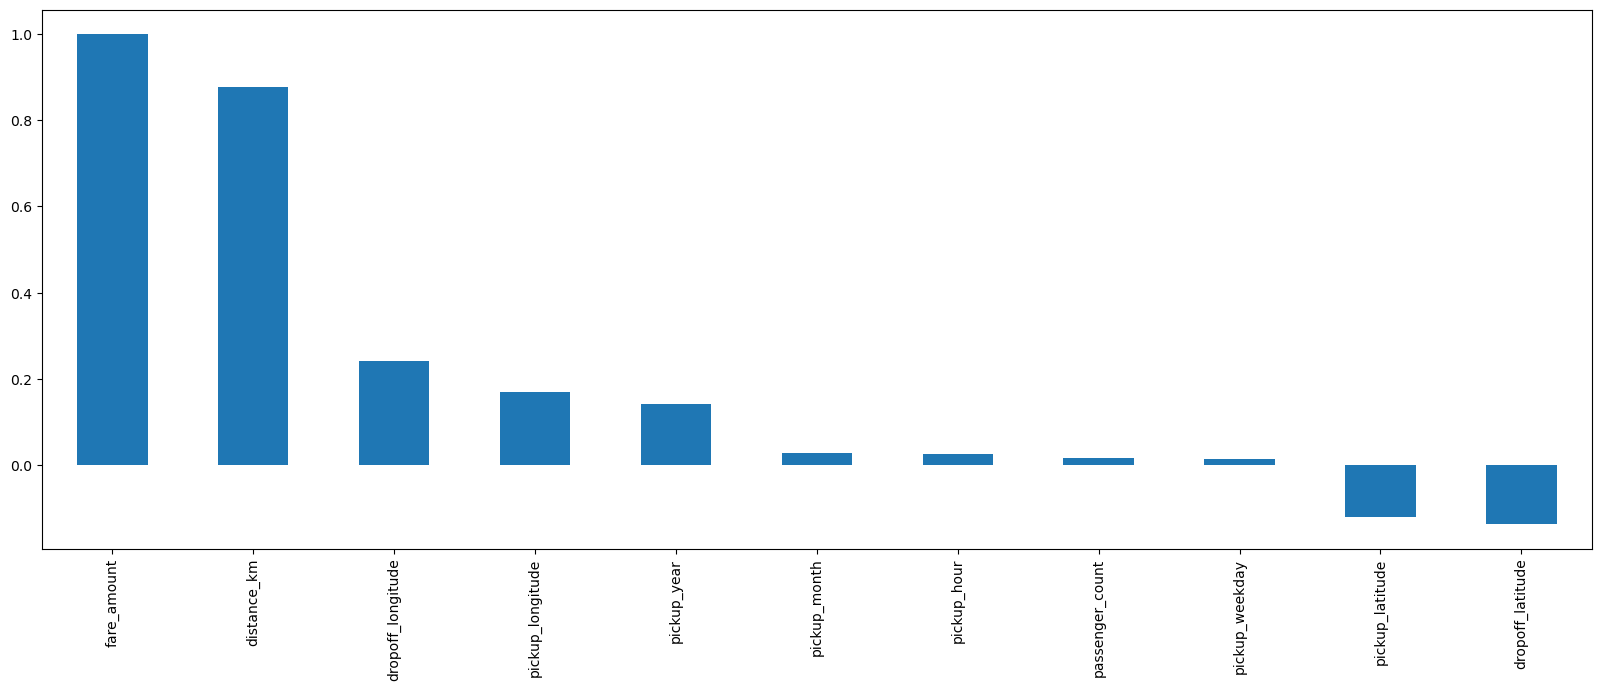

In [221]:
# our target variable 'fare_amount' seems to be highly correlated with 'distance_km', and lessly correlated with 'pickup_year','pickup_month','pickup_hour', and 'passenger_count'.
# From the bar plot - the value closer to -1 and 1 that represents the two variables are highly correlated with each other.
plt.figure(figsize=(20,7))
df.corr()['fare_amount'].sort_values(ascending = False).plot(kind='bar')

plt.show()

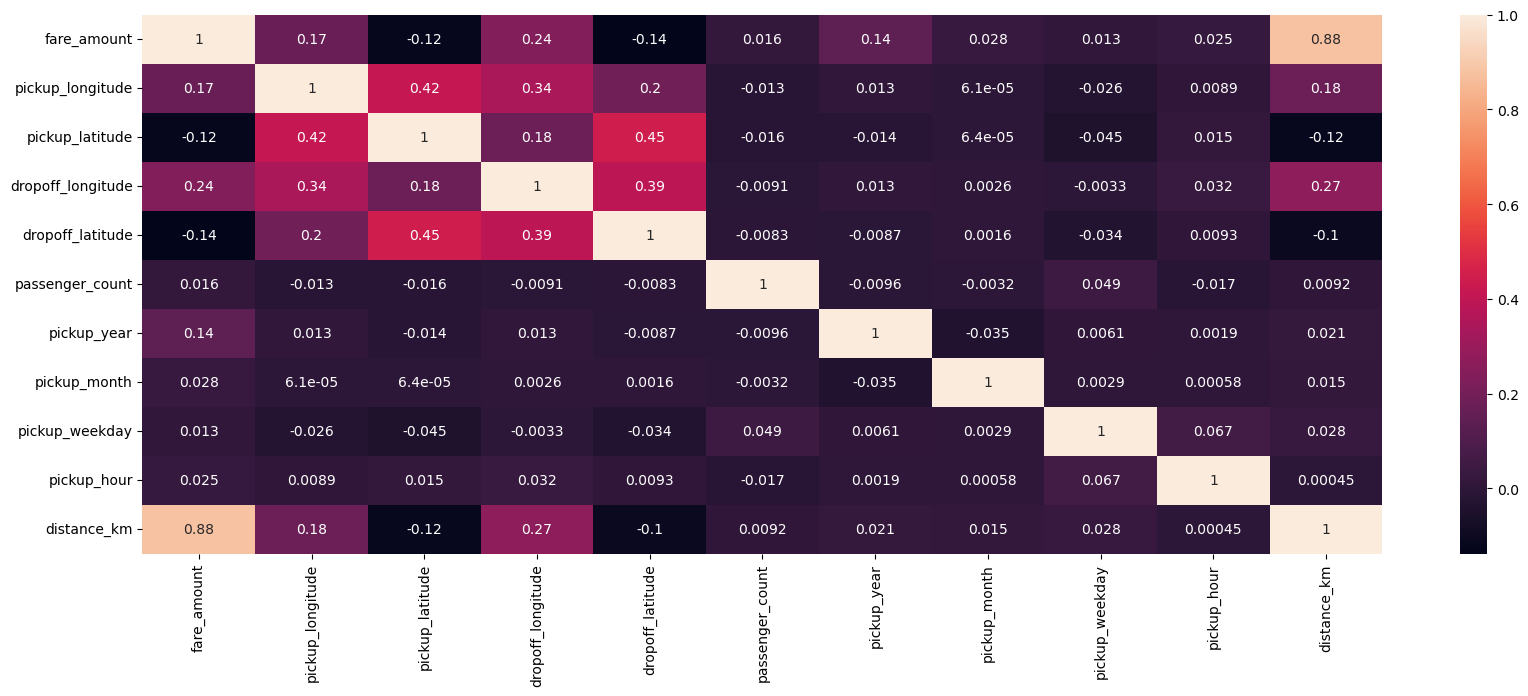

In [222]:
# plotting the correaltion matrix of all the columns in our dataset df.
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

* our target variable 'fare_amount' seems to be highly positively correlated with 'distance_km', and lessly positively correlated with 'pickup_year','pickup_month','pickup_hour', and 'passenger_count'.
* From the bar plot - the value closer to -1 and 1 that represents the two variables are highly correlated with each other.

In [223]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
count,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000
mean,10.122414,-73.979313,40.751396,-73.977294,40.751432,1.515218,2011.747834,2.499685,3.048973,2.983662,2.943069
std,5.423635,0.019467,0.024254,0.021733,0.027312,0.877005,1.859639,1.103430,1.946592,2.219005,2.197959
min,2.900000,-74.029431,40.686251,-74.033029,40.682556,0.000000,2009.000000,1.000000,0.000000,0.000000,0.000084
25%,6.000000,-73.992274,40.736365,-73.991592,40.735252,1.000000,2010.000000,2.000000,1.000000,1.000000,1.287981
50%,8.500000,-73.982118,40.753263,-73.980545,40.753723,1.000000,2012.000000,3.000000,3.000000,3.000000,2.189227
75%,12.500000,-73.968417,40.767527,-73.965455,40.768328,2.000000,2013.000000,3.000000,5.000000,5.000000,3.966106
max,22.250000,-73.929788,40.815702,-73.922037,40.819269,3.500000,2015.000000,4.000000,6.000000,7.000000,7.865133


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  int32  
 7   pickup_month       193718 non-null  int32  
 8   pickup_weekday     193718 non-null  int32  
 9   pickup_hour        193718 non-null  int32  
 10  distance_km        193718 non-null  float64
dtypes: float64(7), int32(4)
memory usage: 13.3 MB


* After taking a final look into the data types of our dataset, all of them are numerical.

## Labeling Categorical Variables

* Converitng numerical columns like 'distance_km', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour' into categorical ones since they further will be transformed into dummy variables which will then allows us to build a model with those variables.

##### Variable one: pickup_year

In [225]:
df.loc[:,'pickup_year']= df['pickup_year'].map({2009:'Pickup_Year_2009',2010:'Pickup_Year_2010',2011:'Pickup_Year_2011',2012:'Pickup_Year_2012',2013:'Pickup_Year_2013',2014:'Pickup_Year_2014', 2015:'Pickup_Year_2015'})

##### Variable two: pickup_month

In [226]:
df.loc[:,'pickup_month'] = df['pickup_month'].map({1:'Pickup_Month_Winter',2:'Pickup_Month_Summer', 3:'Pickup_Month_Spring', 4:'Pickup_Month_Autumn'})

##### Variable three: pickup_weekday

In [227]:
df.loc[:,'pickup_weekday'] = df['pickup_weekday'].map({0:'Pickup_Day_Monday',1:'Pickup_Day_Tuesday', 2:'Pickup_Day_Wednesday', 3:'Pickup_Day_Thursday', 4:'Pickup_Day_Friday', 5:'Pickup_Day_Saturday', 6:'Pickup_Day_Sunday'})

##### Variable four: pickup_hour

In [228]:
df.loc[:,'pickup_hour']= df['pickup_hour'].map({0:'Pickup_Hour_Evening_Breeze',1:'Pickup_Hour_Nightfall_Nooka',2:'Pickup_Hour_Sunrise_Shift', 3:'Pickup_Hour_Afternoon_Glide', 4:'Pickup_Hour_Midnight_Owl', 5:'Pickup_Hour_Noon_Tide', 6:'Pickup_Hour_Morning_Rush', 7:'Pickup_Hour_Early_Bird'})

##### Variable five: distance_km

In [229]:
def distance(distance_km):
    if distance_km >= 0 and distance_km <= 2:
        return 'Very_Short_Distance'
    elif distance_km > 2 and distance_km <= 4:
        return 'Short_Distance'
    elif distance_km > 4 and distance_km <= 6:
        return 'Moderate_Distance'
    else:
        return 'Long_Distance'

df.loc[:,'distance_km'] = df['distance_km'].apply(lambda x: distance(x))

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  object 
 7   pickup_month       193718 non-null  object 
 8   pickup_weekday     193718 non-null  object 
 9   pickup_hour        193718 non-null  object 
 10  distance_km        193718 non-null  object 
dtypes: float64(6), object(5)
memory usage: 16.3+ MB


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  object 
 7   pickup_month       193718 non-null  object 
 8   pickup_weekday     193718 non-null  object 
 9   pickup_hour        193718 non-null  object 
 10  distance_km        193718 non-null  object 
dtypes: float64(6), object(5)
memory usage: 16.3+ MB


In [232]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000
mean,10.122414,-73.979313,40.751396,-73.977294,40.751432,1.515218
std,5.423635,0.019467,0.024254,0.021733,0.027312,0.877005
min,2.900000,-74.029431,40.686251,-74.033029,40.682556,0.000000
25%,6.000000,-73.992274,40.736365,-73.991592,40.735252,1.000000
50%,8.500000,-73.982118,40.753263,-73.980545,40.753723,1.000000
75%,12.500000,-73.968417,40.767527,-73.965455,40.768328,2.000000
max,22.250000,-73.929788,40.815702,-73.922037,40.819269,3.500000


### Creating dummy variables for all categorical variables.

* We need to create dummy variables of all the categorical variables because in model building only numerical values are taken. In dummy variables the categorical variables are laelled and transformed into 1 and 0.

##### Variable one: pickup_year

In [233]:
pickup_year_dummy = pd.get_dummies(df.pickup_year, drop_first=True)
pickup_year_dummy = pickup_year_dummy.astype(int)
pickup_year_dummy.head(10)

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,0,0,0,1
9,0,1,0,0,0,0


##### Variable two: pickup_month

In [234]:
pickup_month_dummy = pd.get_dummies(df.pickup_month, drop_first=True)
pickup_month_dummy = pickup_month_dummy.astype(int)
pickup_month_dummy.head(10)

,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


##### Variable three: pickup_weekday

In [235]:
pickup_weekday_dummy = pd.get_dummies(df.pickup_weekday, drop_first=True)
pickup_weekday_dummy = pickup_weekday_dummy.astype(int)
pickup_weekday_dummy.head(10)

,Pickup_Day_Monday,Pickup_Day_Saturday,Pickup_Day_Sunday,Pickup_Day_Thursday,Pickup_Day_Tuesday,Pickup_Day_Wednesday
0,0,0,0,1,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,0,0,0,0
7,0,0,0,1,0,0
8,0,0,0,0,0,0
9,0,0,0,0,1,0


##### Variable four: pickup_hour

In [236]:
pickup_hour_dummy = pd.get_dummies(df.pickup_hour, drop_first=True)
pickup_hour_dummy = pickup_hour_dummy.astype(int)
pickup_hour_dummy.head(10)

,Pickup_Hour_Early_Bird,Pickup_Hour_Evening_Breeze,Pickup_Hour_Midnight_Owl,Pickup_Hour_Morning_Rush,Pickup_Hour_Nightfall_Nooka,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0


##### Variable five: distance_km

In [237]:
distance_km_dummy = pd.get_dummies(df.distance_km, drop_first=True)
distance_km_dummy = distance_km_dummy.astype(int)
distance_km_dummy.head(10)

,Moderate_Distance,Short_Distance,Very_Short_Distance
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,0
6,0,1,0
7,1,0,0
8,0,1,0
9,0,0,1


In [238]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Day_Thursday,Pickup_Hour_Evening_Breeze,Very_Short_Distance
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Friday,Pickup_Hour_Evening_Breeze,Short_Distance
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Monday,Pickup_Hour_Nightfall_Nooka,Moderate_Distance
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Friday,Pickup_Hour_Sunrise_Shift,Very_Short_Distance
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,Pickup_Year_2014,Pickup_Month_Summer,Pickup_Day_Thursday,Pickup_Hour_Afternoon_Glide,Moderate_Distance


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  object 
 7   pickup_month       193718 non-null  object 
 8   pickup_weekday     193718 non-null  object 
 9   pickup_hour        193718 non-null  object 
 10  distance_km        193718 non-null  object 
dtypes: float64(6), object(5)
memory usage: 16.3+ MB


In [240]:
#creating a fare_amount dataframe
fare_amount = df['fare_amount']

In [241]:
#creating a pickup_longitude dataframe
pickup_longitude = df['pickup_longitude']

In [242]:
#creating a pickup_latitude dataframe
pickup_latitude = df['dropoff_longitude']

In [243]:
#creating a dropoff_latitude dataframe
dropoff_latitude = df['dropoff_latitude']

In [244]:
#creating a dropoff_longitude dataframe
dropoff_longitude = df['dropoff_longitude']

In [245]:
#creating a passenger_count dataframe
passenger_count = df['passenger_count']

In [246]:
# concating the numerical dataframes as one
final_numeric = pd.concat([fare_amount, pickup_longitude, pickup_latitude, dropoff_latitude, dropoff_longitude, passenger_count], axis=1)
final_numeric

,fare_amount,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude,passenger_count
0,7.50,-73.999817,-73.999512,40.723217,-73.999512,1.0
1,7.70,-73.994355,-73.994710,40.750325,-73.994710,1.0
2,12.90,-74.005043,-73.962565,40.772647,-73.962565,1.0
3,5.30,-73.976124,-73.965316,40.803349,-73.965316,3.0
4,16.00,-73.929788,-73.973082,40.761247,-73.973082,3.5
...,...,...,...,...,...,...
193713,3.00,-73.987042,-73.986525,40.740297,-73.986525,1.0
193714,7.50,-73.984722,-74.006672,40.739620,-74.006672,1.0
193715,22.25,-73.986017,-73.922037,40.692588,-73.922037,2.0
193716,14.50,-73.997124,-73.983215,40.695415,-73.983215,1.0


In [247]:
# concating the dummy categorical dataframes as one
final_categorical = pd.concat([pickup_year_dummy, pickup_month_dummy, pickup_weekday_dummy, pickup_hour_dummy, distance_km_dummy], axis=1)
final_categorical

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,Pickup_Day_Monday,...,Pickup_Hour_Early_Bird,Pickup_Hour_Evening_Breeze,Pickup_Hour_Midnight_Owl,Pickup_Hour_Morning_Rush,Pickup_Hour_Nightfall_Nooka,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance
0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193713,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
193714,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
193715,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
193716,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [248]:
# concating all the the categorical dummy dataframes and numerical dataframes together
final_data = pd.concat([fare_amount, pickup_year_dummy, pickup_month_dummy, pickup_weekday_dummy, pickup_hour_dummy, distance_km_dummy, passenger_count, pickup_longitude, pickup_latitude, dropoff_latitude, dropoff_longitude], axis = 1)
final_data

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
0,7.50,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,1.0,-73.999817,-73.999512,40.723217,-73.999512
1,7.70,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.0,-73.994355,-73.994710,40.750325,-73.994710
2,12.90,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1.0,-74.005043,-73.962565,40.772647,-73.962565
3,5.30,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,3.0,-73.976124,-73.965316,40.803349,-73.965316
4,16.00,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,3.5,-73.929788,-73.973082,40.761247,-73.973082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193713,3.00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1.0,-73.987042,-73.986525,40.740297,-73.986525
193714,7.50,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1.0,-73.984722,-74.006672,40.739620,-74.006672
193715,22.25,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2.0,-73.986017,-73.922037,40.692588,-73.922037
193716,14.50,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1.0,-73.997124,-73.983215,40.695415,-73.983215


In [249]:
final_data.shape

(193718, 31)

* After the concatination the total number of rows in the dataset are 193718 and columns are 31.

### Splitting data into Train and Test

In [250]:
#importing relevant packages

import sklearn
from sklearn.model_selection import train_test_split

In [251]:
# dividing the data into train and test split

final_train, final_test = train_test_split(final_data, train_size = 0.7, random_state = 365)

* I have divided the dataset into 70-30 ratio where 70% of the original dataset will be used for training the model and the remaining 30% will be used for testing the model.

In [252]:
final_train.shape

(135602, 31)

* In the train set there are 135602 rows and 31 columns.

In [253]:
final_test.shape

(58116, 31)

* In the test set there are 58116 rows and 31 columns.

### Performing rescaling of numeric values

* In the model building process, I performed rescaling of numeric values to standardize the features of the dataset we have. We imported the StandardScaler from scikit-learn, as it removes the mean and scales each feature/variable to unit variance. 

* This is an essential preprocessing step because it ensures that each feature contributes equally to the distance computations in models that are sensitive to the scale of the data. Standardizing the data can result in better performance as it can make the training process faster and reduce the chances of getting stuck in local optima.

In [254]:
# Initialize the scaler
scaler = StandardScaler()

In [255]:
#creating a list of numeric variables

numeric = ['fare_amount', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count']

In [256]:
# Fit the scaler on the training set (only for numeric features)
scaler.fit(final_train[numeric])

StandardScaler()

In [257]:
# Transform the training set
final_train[numeric] = scaler.transform(final_train[numeric])

* Here, I have done rescalling of numerica variables in the train set. I'll be seperately performing rescalling of numeri variables in the test set.

In [258]:
final_train.head()

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
53740,-1.037959,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,-0.587821,-1.291868,-1.271978,-0.584027,-1.271978
36019,-0.945714,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,-0.587821,-1.656052,-1.722829,-1.361593,-1.722829
106167,1.268168,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,-0.587821,-1.112396,0.830647,0.587757,0.830647
181197,1.360413,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,-0.587821,-1.360967,0.138578,0.277951,0.138578
113209,1.692496,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0.551801,-1.473755,-1.817989,-1.551912,-1.817989


In [259]:
final_train.describe()

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
count,1.356020e+05,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,...,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,1.356020e+05,1.356020e+05,1.356020e+05,1.356020e+05,1.356020e+05
mean,3.130848e-17,0.149172,0.159009,0.160256,0.157608,0.150308,0.069925,0.281530,0.234495,0.250129,...,0.148729,0.102049,0.113597,0.296633,0.455369,-2.965791e-17,-2.805499e-13,-3.326578e-13,5.508595e-14,-3.326578e-13
std,1.000004e+00,0.356259,0.365686,0.366844,0.364375,0.357374,0.255022,0.449747,0.423684,0.433089,...,0.355823,0.302713,0.317323,0.456775,0.498006,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.333143e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.727443e+00,-2.573758e+00,-2.561168e+00,-2.518737e+00,-2.561168e+00
25%,-7.612236e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.878209e-01,-6.664094e-01,-6.571804e-01,-5.932600e-01,-6.571804e-01
50%,-2.999981e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.878209e-01,-1.446801e-01,-1.486633e-01,8.476377e-02,-1.486633e-01
75%,4.379626e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,5.518007e-01,5.595361e-01,5.418577e-01,6.185007e-01,5.418577e-01
max,2.236742e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.261233e+00,2.543041e+00,2.538800e+00,2.484939e+00,2.538800e+00


### Diving the data in x and y

In [260]:
y_train = final_train.pop('fare_amount')
x_train = final_train

In [261]:
y_train.head()

53740    -1.037959
36019    -0.945714
106167    1.268168
181197    1.360413
113209    1.692496
Name: fare_amount, dtype: float64

In [262]:
x_train.head()

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,Pickup_Day_Monday,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
53740,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,-0.587821,-1.291868,-1.271978,-0.584027,-1.271978
36019,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,-0.587821,-1.656052,-1.722829,-1.361593,-1.722829
106167,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,-0.587821,-1.112396,0.830647,0.587757,0.830647
181197,0,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,-0.587821,-1.360967,0.138578,0.277951,0.138578
113209,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.551801,-1.473755,-1.817989,-1.551912,-1.817989


### Model Building

#### Lasso Regression Model Selection

For this scenario, I have gone with the Lasso Regression model, which stands for Least Absolute Shrinkage and Selection Operator. This model is particularly well-suited for situations where we have a large number of features that may contribute to overfitting.

Lasso Regression not only helps in reducing overfitting but also performs feature selection by penalizing the absolute size of the coefficients. By introducing a regularization parameter, alpha, Lasso encourages simple, sparse models (i.e., models with fewer parameters). This is beneficial when we suspect that only a subset of the features are truly important for prediction, or when we want to reduce the complexity of a model with too many variables.

Another advantage of Lasso Regression is its ability to handle multicollinearity among the features by selecting only one feature out of a group of highly correlated features, which is an essential factor in regression models where interpretability is a concern.

##### Lasso Regression Model

In [263]:
# Importing required libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Creating the Lasso Regression model
# By deault we have chosen the 0.01 value for the alpha
lasso_model = Lasso(alpha=0.01)

# Fitting the model to the training data
lasso_model.fit(x_train, y_train)

# Making predictions on the training data
y_train_pred = lasso_model.predict(x_train)

# Calculating Mean Squared Error on training data
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Training Data: ", mse)

# Calculating Mean Absolute Error on training data
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error on Training Data: ", mae)

# Calculating R-squared on training data
r_squared = lasso_model.score(x_train, y_train)
print("R-squared on Training Data: ", r_squared)

Mean Squared Error on Training Data:  0.2620596695718759
Mean Absolute Error on Training Data:  0.3814908639035708
R-squared on Training Data:  0.7379403304281241


### Evaluate the performance of the Lasso Regression Model on Train Set

- **Mean Squared Error (MSE) of 0.2620**: This is a measure of the average squared difference between the actual and predicted values. AN MSE of 0.2620 suggests that, the model's predictions are relatively close to the actual values. The closer this value is to zero, the more closer the predicted values are with the actual ones.

- **Mean Absolute Error (MAE) of 0.3814**: This is a measure of the average absolute differences between the actual and predicted values. AN MAE of 0.3814 suggest that, on average, the model's predictions are within 0.3814 units of the actual values. The closer this value is to zero, the more closer the predicted values are with the actual ones.

- **R-squared of 0.7379**: This value indicates that approximately 73.79% of the variance in your target variable is explained by the model. This signifies a strong model fit to the data.

### Hyperparameter Tuning Lasso Regression Model

The process of building a predictive model not only involves selecting a suitable algorithm and model but also fine-tuning it to enhance its performance. Hyperparameter tuning is a critical step in the model development process. For Lasso Regression, which is a linear regression model with an added regularization term, the key hyperparameter is alpha. This hyperparameter controls the strength of the penalty applied to the model's coefficients and can significantly affect model performance.

To identify the optimal value for alpha, we employ Grid Search, a systematic approach that searches across a specified range of alpha values and evaluates the model's performance for each one using cross-validation. This method ensures that we select an alpha value that generalizes well and prevents overfitting, leading to a more robust and accurate model.

In the following code cell, we execute a Grid Search to fine-tune our Lasso Regression model. By iterating through a predefined set of alpha values, we aim to find the best parameter that minimizes the Mean Squared Error (MSE) on our training dataset, using a 5-fold cross-validation strategy for a reliable performance estimate.

##### Grid Search for Hyperparameter Tuning on Training Set

In [264]:
# Importing required libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creating the Lasso Regression model
lasso = Lasso()

# Defining the range of alpha values to test
alpha_values = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=alpha_values, scoring='neg_mean_squared_error', cv=5)

# Fitting GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Getting the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha Value: ", best_alpha)

# Creating a new Lasso model with the best alpha value
lasso_model_optimized = Lasso(alpha=best_alpha)

# Fitting the optimized model to the training data
lasso_model_optimized.fit(x_train, y_train)

# Making predictions on the training data
y_train_pred_optimized = lasso_model_optimized.predict(x_train)

# Calculating Mean Squared Error and Mean Absolute Error on training data
mse_train_optimized = mean_squared_error(y_train, y_train_pred_optimized)
mae_train_optimized = mean_absolute_error(y_train, y_train_pred_optimized)

# Calculating R-squared on training data
r_squared_train_optimized = lasso_model_optimized.score(x_train, y_train)

# Printing the results
print("Optimized MSE on Training Data: ", mse_train_optimized)
print("Optimized MAE on Training Data: ", mae_train_optimized)
print("Optimized R-squared on Training Data: ", r_squared_train_optimized)

Best Alpha Value:  0.0001
Optimized MSE on Training Data:  0.24253500980621145
Optimized MAE on Training Data:  0.35266756354855355
Optimized R-squared on Training Data:  0.7574649901937885


### Evaluating  the performance of the Lasso Regression Model after performing Hyperparameter Tuning

a) **Best alpha value 0.0001**: This number of 0.0001 is the optimized regularization strength parameter for the Lasso regression model. This suggests that a very little regularization was applied.

b) **Optimized MSE of 0.2425**: The MSE of the Lasso regression model decreased from 0.2620 to 0.2425, indicating that the predictive accuracy of the model has been increased.

c) **Optimized MAE of 0.3526**: The MAE of the Lasso regression model decreased from 0.3814 to 0.3526, indicating that the predictive accuracy of the model has been increased.

d) **Optimized R-squared of 0.7574**: The R-squared value increased from 0.7379 to 0.7574, indicating that approximately 75.74% of the variance in the target variable is explained by the model. This signifies an even stronger model fit to the data compared to the initial model.

### Making Predictions on New Unseen Data

In [265]:
final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [266]:
final_test.head()

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
93472,-0.076194,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,-0.586671,2.546294,2.551105,2.481230,2.551105
115422,-0.370785,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,-0.586671,-0.259357,0.763218,0.858832,0.763218
10552,-0.076194,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,-0.586671,-0.239256,1.112884,0.741812,1.112884
99839,-0.370785,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.586671,-0.404848,-1.265394,-0.345891,-1.265394
139970,-0.849496,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,-0.586671,0.491484,0.569843,0.768015,0.569843


In [267]:
y_test = final_test.pop('fare_amount')
x_test = final_test

### Model Building

In [268]:
# Predicting with the optimized Lasso model
y_test_pred_optimized = lasso_model_optimized.predict(x_test)

# Calculate Mean Squared Error on test data
mse_test_optimized = mean_squared_error(y_test, y_test_pred_optimized)
print("Optimized Mean Squared Error on Test Data: ", mse_test_optimized)

# Calculate Mean Absolute Error on test data
mae_test_optimized = mean_absolute_error(y_test, y_test_pred_optimized)
print("Optimized Mean Absolute Error on Test Data: ", mae_test_optimized)

# Calculate R-squared on test data
r_squared_test_optimized = r2_score(y_test, y_test_pred_optimized)
print("Optimized R-squared on Test Data: ", r_squared_test_optimized)

Optimized Mean Squared Error on Test Data:  0.24184478945275406
Optimized Mean Absolute Error on Test Data:  0.35169772098194474
Optimized R-squared on Test Data:  0.758155210547246


To evaluate the final trained model and assess how well it generalizes to unseen data, we'll compare the performance metrics obtained during the training phase with those obtained on the testing set. The main metrics we are considering are:

### Evaluating the performance of the Optimized Lasso Regression Model on Train Set
- MSE: 0.2425350980621145
- MAE: 0.3526675635485534
- R-squared: 0.7574649901937885

### Evaluating the performance of the Optimized Lasso Regression Model on Test Set
- MSE: 0.24184478945275414
- MAE: 0.3516977209819446
- R-squared: 0.7581552105472459

### Evaluation

- **MSE & MAE**: The values for MSE and MAE on the training and testing sets are very close to each other. This is a good sign as it suggests that the model is generalizing well and is not overfitting the training data. Overfitting would be indicated by a significantly lower error on the training set compared to the test set.

- **R-squared**: The R-squared values are also very similar between the training and testing sets. This indicates that the model's ability to explain the variance in the data is consistent across both sets, which is another indicator of good generalization.

The consistency between training and testing metrics suggests that the model is neither overfitting nor underfitting. It appears to have generalized well to the unseen data, as indicated by the similarity in performance metrics.

### Feature Importance in Lasso Regression

#### Analyzing Feature Importance in Lasso Regression

After fitting my Lasso Regression model, an important step is to understand which features are most influential in predicting the target variable. Lasso Regression is particularly useful for this purpose because it applies L1 regularization, which can shrink some of the regression coefficients to zero, effectively selecting a simpler model that avoids overfitting.

By examining the non-zero coefficients, I can identify the features that have the most impact on the response variable. However, to get a full picture of feature importance, I consider both the magnitude and the sign of the coefficients. A larger absolute value of a coefficient indicates a stronger effect on the dependent variable, with the sign indicating the direction of the association (positive or negative).

In the following analysis, I will extract the coefficients from our trained Lasso model and rank the features by the absolute size of their coefficients. This will highlight the most significant predictors and their relative influence on the model's predictions. 

##### Important Features in Lasso Regression

In [269]:
# Assuming 'x_train' is a DataFrame and not just a NumPy array

# Get the feature names
feature_names = x_train.columns

# Get the model's coefficients
coefficients = lasso_model.coef_

# Create a DataFrame of feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate the absolute value of the coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Sort the features by the absolute value of their coefficients
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted features
print(feature_importance)

                        Feature  Coefficient  Absolute Coefficient
24          Very_Short_Distance    -2.183292              2.183292
23               Short_Distance    -1.517543              1.517543
22            Moderate_Distance    -0.708844              0.708844
4              Pickup_Year_2014     0.161087              0.161087
3              Pickup_Year_2013     0.128793              0.128793
5              Pickup_Year_2015     0.087767              0.087767
28             dropoff_latitude    -0.076775              0.076775
26             pickup_longitude     0.030874              0.030874
29            dropoff_longitude     0.030175              0.030175
27            dropoff_longitude     0.021803              0.021803
0              Pickup_Year_2010    -0.019223              0.019223
20        Pickup_Hour_Noon_Tide     0.017893              0.017893
1              Pickup_Year_2011    -0.005768              0.005768
21    Pickup_Hour_Sunrise_Shift    -0.000000              0.00

#### Interpretation after Analyzing Feature Importance in Lasso Regression:

The feature importance data provided shows the coefficients associated with each feature in the model. These coefficients represent the strength and direction of the relationship between each feature and the target variable, which in this context seems to be the fare amount. Here's an analysis of the top features based on the absolute value of their coefficients:

1. **Very_Short_Distance**: Coefficient of -2.183292
   - This feature has the highest absolute value, indicating that very short distances have a significant negative impact on the fare amount. This implies that as the distance decreases, the fare amount tends to decrease sharply, which is intuitive for a taxi fare prediction model.

2. **Short_Distance**: Coefficient of -1.517543
   - Similarly, short distances also negatively affect the fare amount, but less so than very short distances. This suggests a tiered approach to distance-based pricing, where shorter trips cost significantly less.

3. **Moderate_Distance**: Coefficient of -0.708844
   - Moderate distances have a negative but lesser impact on fare compared to very short and short distances. This indicates a gradient in how distance affects fare, with longer distances likely having a smaller negative impact or even a positive impact on the fare.

4. **Pickup_Year_2014**: Coefficient of 0.161087
   - The positive coefficient for pickups in the year 2014 indicates that fares were higher in that year compared to the base year (which is not listed). This could be due to inflation, changes in pricing policy, or other economic factors.

5. **Pickup_Year_2013**: Coefficient of 0.128793
   - Similar to 2014, this suggests that fares in 2013 were higher than the base year, again indicating possible temporal effects on fare pricing.

6. **Pickup_Year_2015**: Coefficient of 0.087767
   - This shows a positive impact on fares in 2015, which is lower than 2013 and 2014, suggesting a possible trend of increasing or decreasing fares over the years.

7. **Dropoff_Latitude** and **Pickup_Longitude**: Coefficients of -0.076775 and 0.030874 respectively
   - Geographic locations seem to play a role, with specific latitudes and longitudes being associated with higher or lower fares, possibly reflecting the economic characteristics of different areas.

8. **Pickup_Year_2010**: Coefficient of -0.019223
   - The negative coefficient for 2010 suggests that fares were lower in that year compared to the base year. This could reflect a historical pricing change.
  

The implications of these feature importances are as follows:

- **Distance is a major determinant of fare**: The model confirms the expected behavior that shorter trips cost less, and there is a tiered impact on the fare based on the distance category.
- **Temporal factors influence fare**: The year of the pickup affects the fare, which may reflect inflation, regulatory changes, or shifts in the supply and demand dynamics of the taxi service.
- **Geographic factors**: The impact of latitude and longitude on fare suggests that certain areas may have higher or lower fares, which could be due to factors like the average wealth of an area, typical traffic conditions, or the prevalence of longer trips from certain locations.

The model seems to reflect real-world expectations of how taxi fares are calculated, with distance and location being key factors. However, to fully understand the implications, one would also need to consider the business context, pricing strategies, and economic conditions that affect taxi fares.